In [9]:
import numpy as np

In [10]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xj, yj in zip(x, y):
                update = self.eta * (yj - self.predict(xj))
                self.w_[1:] += update*xj
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        y = np.dot(x, self.w_[1:]) + self.w_[0]
        return y
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [11]:
import os
import pandas as pd

In [12]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

In [13]:
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [14]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [15]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
import matplotlib.pyplot as plt


y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df.iloc[0:100, [0, 2]].values

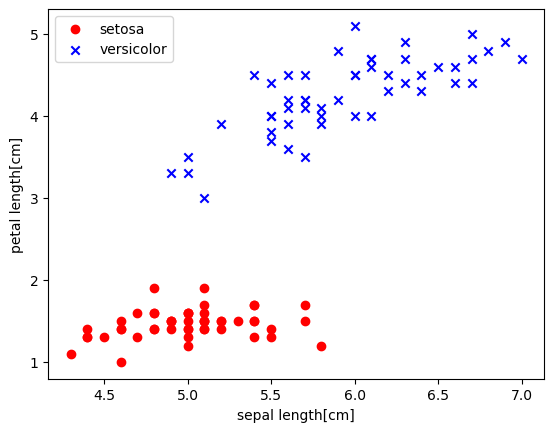

In [26]:
plt.scatter(x[:50,0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

In [27]:
ppn = Perceptron(eta=0.1 ,n_iter=10)
ppn.fit(x,y)

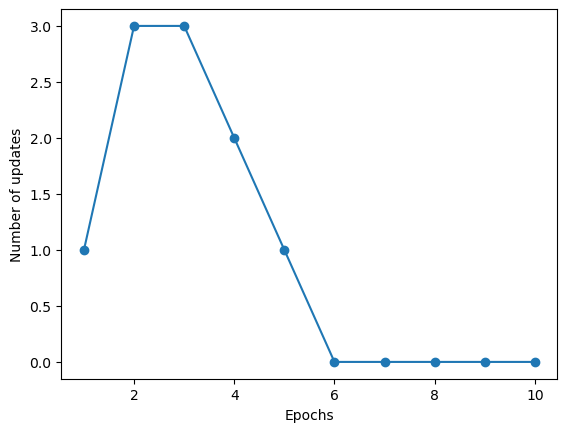

In [28]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

/tmp/ipykernel_64870/1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


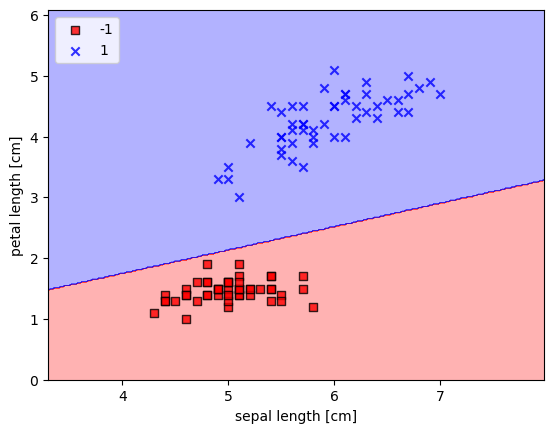

In [30]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()